

**Data Science and Business Analytics Tasks**

Task #1 : Prediction of percentage of marks of a student based on number of hours studied 

**Author : Purvee Parikh**

---



Importing nessceay libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

Reading data from a remote link

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Understanding shape of our dataset 

In [3]:
data.shape


(25, 2)

Using the info, we can see if there are any null values in our data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


 Using the describe,we can see if there is any sudden jump in the data’s values.

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Visualisation**

 Using matplotlib, plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.

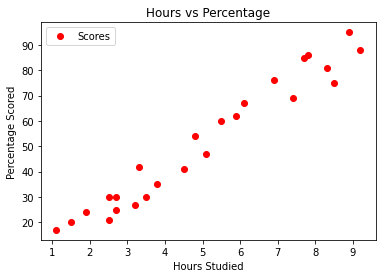

In [6]:
data.plot(x='Hours', y='Scores',style='ro')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

Density plot using seaborn for Scores obtained by Students

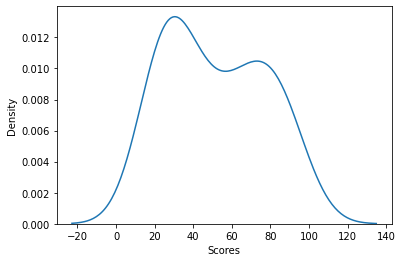

In [7]:
sns.kdeplot(data['Scores'])
plt.show()

Density plot using seaborn for number of hours the students studied

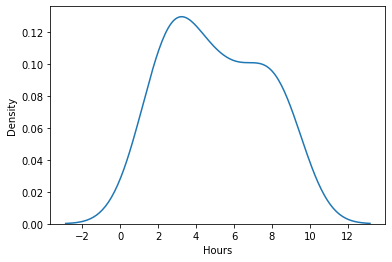

In [8]:
sns.kdeplot(data['Hours'])
plt.show()

Using seaborn, to plot a scatter graph, marked scored bu students vs number of hours studied 

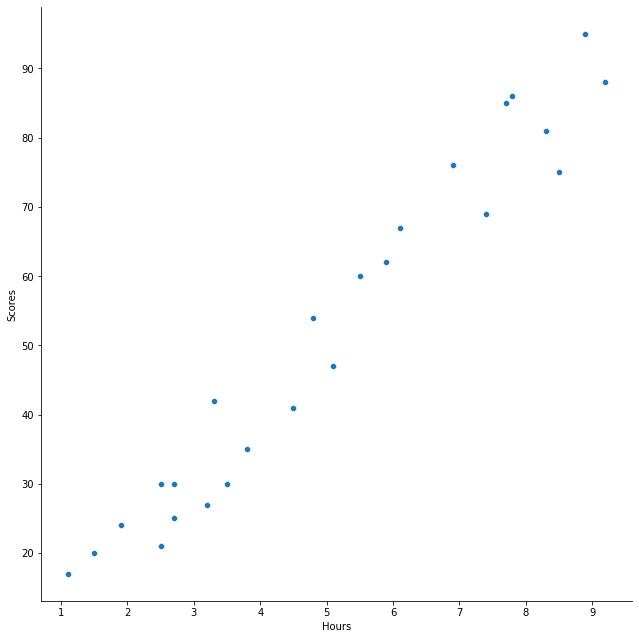

In [9]:
sns.pairplot(data, x_vars=['Hours'], 
             y_vars='Scores',height = 9,aspect =1, kind='scatter')
plt.show()

**Building and training the model**

Using the following two packages, we can build a simple linear regression model.



1.   sklearn
2.   statsmodel



In [33]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,train_size = 0.7, random_state = 0)




Creating X and y

In [30]:
X = data['Hours']
y = data['Scores']


**The training dataset**

In [29]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5]])

In [28]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21])

The statsmodel library fits a line that passes through the origin.
So, to have an intercept, we need to add the add_constant attribute manually.

In [31]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

array([2.75245122, 9.72526939])

The summary of all the different parameters of the regression line fitted like R², probability of F-statistic, and p-value.

In [34]:
lr.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     286.7
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           3.47e-11
Time:                        12:09:51   Log-Likelihood:                -53.512
No. Observations:                  17   AIC:                             111.0
Df Residuals:                      15   BIC:                             112.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7525      3.267      0.842      0.413      -4.212       9.717
x1             9.7253      0.574     16.933      0.000       8.501      10.949
==============================================================================
Omnibus:                        3.961   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                1.362
Skew:                          -0.144   Prob(JB):                        0.506
Kurtosis:                       1.644   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Training the Algorithm**

We have split our data into training and testing sets, and now is finally the time to train our algorithm

In [35]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Visualization of the scatter plot between Hours studied and Scored marks by students.

From the parameters, we got the values of the* intercept* and the *slope* for the straight line. The equation of the line is,

Scored = 1.4951 + 9.8717 * HoursStudies

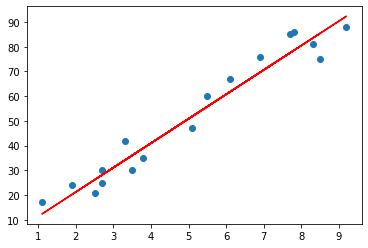

In [36]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.4951 + 9.8717*X_train, 'r')
plt.show()

In [37]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [39]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)
y_test_pred

array([17.34035531, 33.87331327, 74.71944471, 27.0656247 , 60.13154063])

In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.340355
1,27,33.873313
2,69,74.719445
3,30,27.065625
4,62,60.131541


In [41]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = [[9.25]]
Predicted Score = 92.7111930880497


**Evaluating the model**

In [42]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.011047471119305
